![title](heartbeat.png)

# First Notebook

## Learning how things work

For titles #, ##, ...

Create above: a

Create below: b

Undo: z

Execute stay in cell: ctrl + return

Execute to next cell: shift + return

Switch mode: return - esc

Switch language: m - y

In [13]:
2 + 3

5

Code block: ```
```
x = 5 * 5
x += 2
```

Line: ---

---

To autocomplete code: tab

## Code

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [35]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

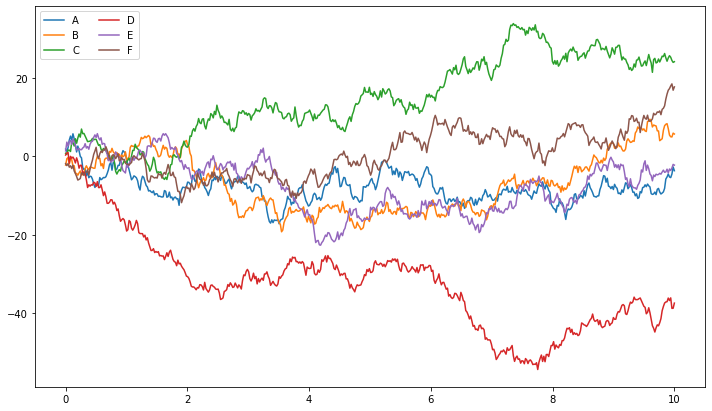

In [36]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend("ABCDEF", ncol=2, loc="upper left")

## Fetching data

In [6]:
import pandas as pd
import requests

In [7]:
def get_historic_price(symbol, exchange="bitfinex", after="2018-09-01"):
    url = "https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc".format(
        symbol=symbol, exchange=exchange
    )
    resp = requests.get(
        url,
        params={"periods": "3600", "after": str(int(pd.Timestamp(after).timestamp()))},
    )
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(
        data["result"]["3600"],
        columns=[
            "CloseTime",
            "OpenPrice",
            "HighPrice",
            "LowPrice",
            "ClosePrice",
            "Volume",
            "NA",
        ],
    )
    df["CloseTime"] = pd.to_datetime(df["CloseTime"], unit="s")
    df.set_index("CloseTime", inplace=True)
    return df

In [8]:
last_week = pd.Timestamp.now() - pd.offsets.Day(7)
last_week

Timestamp('2020-10-04 01:36:13.894858')

In [9]:
btc = get_historic_price("btc", "bitstamp", after=last_week)

In [10]:
eth = get_historic_price("eth", "bitstamp", after=last_week)

## Visualizing data

In [29]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,167.000000,167.000000,167.000000,167.000000,167.000000,1.670000e+02
mean,10810.402575,10836.893114,10788.593593,10814.721317,182.825101,1.977539e+06
std,254.548849,260.192111,250.211851,255.710759,201.106722,2.177398e+06
min,10544.630000,10554.700000,10524.810000,10545.000000,11.534285,1.220084e+05
25%,10622.895000,10639.345000,10601.720000,10625.375000,58.240976,6.441858e+05
50%,10700.650000,10736.890000,10685.570000,10710.040000,123.158274,1.342014e+06
75%,10903.065000,10941.840000,10878.370000,10902.440000,211.012232,2.231987e+06
max,11416.790000,11496.060000,11383.530000,11414.970000,1257.064991,1.343307e+07


In [11]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-10-04 02:00:00,10546.37,10554.70,10524.81,10545.00,29.828737,314375.121051
2020-10-04 03:00:00,10544.63,10560.17,10534.46,10554.56,12.404200,130829.256213
2020-10-04 04:00:00,10555.34,10564.99,10547.42,10550.57,12.527456,132275.187072
2020-10-04 05:00:00,10554.60,10583.38,10553.46,10567.27,20.276280,214371.683007
2020-10-04 06:00:00,10573.05,10583.85,10566.75,10566.75,11.534285,122008.405165


<AxesSubplot:xlabel='CloseTime'>

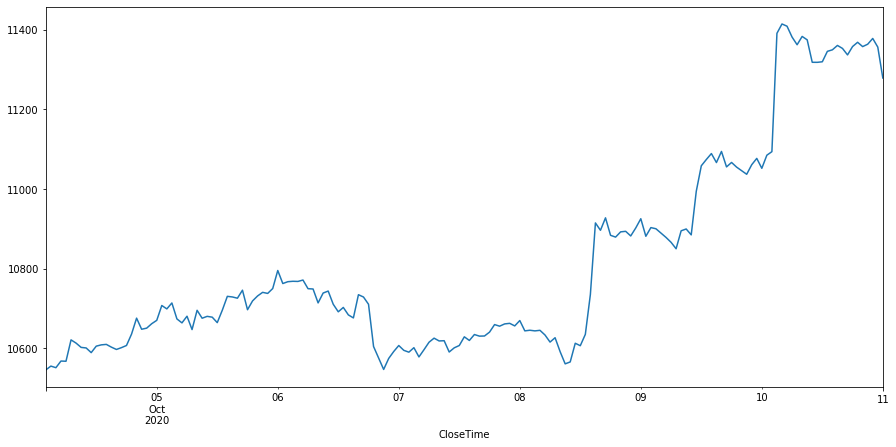

In [12]:
btc["ClosePrice"].plot(figsize=(15, 7))

In [13]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-10-04 02:00:00,347.14,347.14,344.16,345.38,560.528695,193524.629567
2020-10-04 03:00:00,345.22,346.29,344.22,346.29,530.188809,182967.928689
2020-10-04 04:00:00,346.72,346.72,345.91,346.00,83.498882,28906.396094
2020-10-04 05:00:00,345.96,347.19,345.96,346.85,285.189678,98905.460941
2020-10-04 06:00:00,346.93,347.30,346.66,346.71,155.071480,53809.701480


<AxesSubplot:xlabel='CloseTime'>

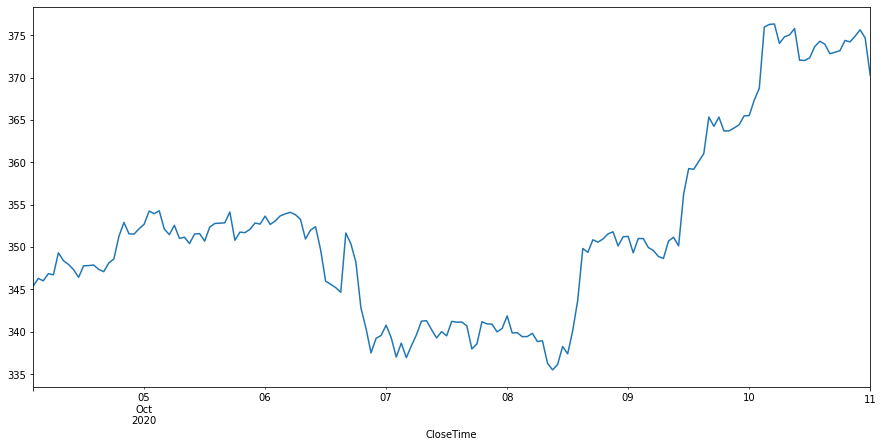

In [14]:
eth["ClosePrice"].plot(figsize=(15, 7))

In [17]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show

In [18]:
output_notebook()

Loading BokehJS ...

In [23]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha = 0.3
p1.xaxis.axis_label = "Date"
p1.yaxis.axis_label = "Price"

p1.line(btc.index, btc["ClosePrice"], color="#f2a900", legend="Bitcoin")
# p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

## Exporting data

In [25]:
writer = pd.ExcelWriter("cryptos.xlsx")

In [26]:
btc.to_excel(writer, sheet_name="Bitcoin")

In [27]:
eth.to_excel(writer, sheet_name="Ether")

In [28]:
writer.save()